**Passos para criar um perceptron usando TensorFlow:**
*   Importar as bibliotecas necessárias
*   Carregar e preparar o dataset
*   Definir e compilar o modelo do perceptron
*   Treinar o modelo
*   Avaliar o modelo

Importando as bibliotecas e carregando o dataset: Importamos o TensorFlow para criar o modelo e funções do scikit-learn para manipular o dataset e realizar a padronização.

In [296]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [297]:
# Carregar o arquivo XLS com os dados
file_path = 'Tabela_Perceptron.xls'
data_xls = pd.read_excel(file_path)

# Exibir os dados para verificação
print(data_xls.to_string())

# Separar os dados em features (X) e labels (y)
X = data_xls[['x1', 'x2', 'x3']].values
y = data_xls['d'].values

        x1      x2       x3  d
0  -0.6508  0.1097   4.0009 -1
1  -1.4492  0.8896   4.4005 -1
2   2.0850  0.6876  12.0710 -1
3   0.2626  1.1476   7.7985  1
4   0.6418  1.0234   7.0427  1
5   0.2569  0.6730   8.3265 -1
6   1.1155  0.6043   7.4446  1
7   0.0914  0.3399   7.0677 -1
8   0.0121  0.5256   4.6316  1
9  -0.0429  0.4660   5.4323  1
10  0.4340  0.6870   8.2287 -1
11  0.2735  1.0287   7.1934  1
12  0.4839  0.4851   7.4850 -1
13  0.4089 -0.1267   5.5019 -1
14  1.4391  0.1614   8.5843 -1
15 -0.9115 -0.1973   2.1962 -1
16  0.3654  1.0475   7.4858  1
17  0.2144  0.7515   7.1699  1
18  0.2013  1.0014   6.5489  1
19  0.6483  0.2183   5.8991  1
20 -0.1147  0.2242   7.2435 -1
21 -0.7970  0.8795   3.8762  1
22 -1.0625  0.6366   2.4707  1
23  0.5307  0.1285   5.6883  1
24 -1.2200  0.7777   1.7252  1
25  0.3957  0.1076   5.6623 -1
26 -0.1013  0.5989   7.1812 -1
27  2.4482  0.9455  11.2095  1
28  2.0149  0.6192  10.9263 -1
29  0.2012  0.2611   5.4631  1


In [298]:
# Verificar se há dados faltantes
print(data_xls.isnull().sum())


x1    0
x2    0
x3    0
d     0
dtype: int64


In [299]:
# Análise estatística básica
print(data_xls.describe())


              x1         x2         x3          d
count  30.000000  30.000000  30.000000  30.000000
mean    0.272497   0.556747   6.531860   0.066667
std     0.918388   0.366427   2.449843   1.014833
min    -1.449200  -0.197300   1.725200  -1.000000
25%    -0.086700   0.233425   5.440000  -1.000000
50%     0.259750   0.611750   7.055200   1.000000
75%     0.519000   0.854050   7.485600   1.000000
max     2.448200   1.147600  12.071000   1.000000


In [300]:
# Converter valores específicos para 0
y = np.where(y == -1, 0, y)

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados usando o StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [301]:
# Criar o modelo de rede neural
net = Sequential()

net.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)))  # Camada oculta com regularização L2
net.add(Dropout(0.5))  # Adicionar Dropout para evitar overfitting
net.add(Dense(1024, activation='tanh'))  # Camada oculta adicional
net.add(Dense(1, activation='sigmoid'))  # Camada de saída para classificação binária

In [302]:
# Resumo do modelo
net.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 512)               2048      
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 1025      
Total params: 528,385
Trainable params: 528,385
Non-trainable params: 0
_________________________________________________________________


In [303]:
# Compilar o modelo
net.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [304]:
# Treinar o modelo
history = net.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1/1 [==============================] - 1s 796ms/step - loss: 0.7417 - accuracy: 0.5417 - val_loss: 0.8205 - val_accuracy: 0.6667
Epoch 2/20
1/1 [==============================] - 0s 122ms/step - loss: 0.6008 - accuracy: 0.8333 - val_loss: 0.9058 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 134ms/step - loss: 0.5499 - accuracy: 0.8333 - val_loss: 0.9745 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 89ms/step - loss: 0.4973 - accuracy: 0.8333 - val_loss: 1.0041 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 115ms/step - loss: 0.4840 - accuracy: 0.8333 - val_loss: 0.9921 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 99ms/step - loss: 0.4276 - accuracy: 0.8333 - val_loss: 0.9596 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 73ms/step - loss: 0.4309 - accuracy: 0.8333 - val_loss: 0.9190 - val_accuracy: 0.5000
Epoch 8/20
1/1 [=======

In [305]:
# Avaliar o modelo
test_loss, test_acc = net.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

1/1 [==============================] - 0s 43ms/step - loss: 0.4087 - accuracy: 1.0000
Test accuracy: 1.0000


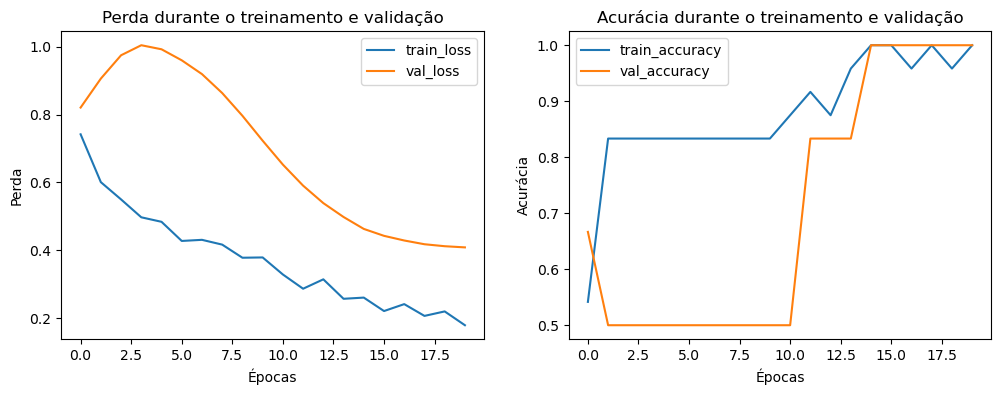

In [306]:
# Plotar as curvas de perda e acurácia
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Perda durante o treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Acurácia durante o treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

In [307]:
# Salvar o modelo treinado
net.save("meu_code.keras")

Exercícios
¶
1) Altere o valor do hiperparâmetro num_hiddens e veja como esse hiperparâmetro influencia seus resultados. Determine o melhor valor deste hiperparâmetro, mantendo todos os outros constantes.

2) Experimente adicionar uma camada oculta adicional para ver como isso afeta os resultados.

3) Como mudar a taxa de aprendizado altera seus resultados? Corrigindo a arquitetura do modelo e outros hiperparâmetros (incluindo o número de épocas), qual taxa de aprendizado oferece os melhores resultados?

4) Qual é o melhor resultado que você pode obter otimizando todos os hiperparâmetros (taxa de aprendizagem, número de épocas, número de camadas ocultas, número de unidades ocultas por camada) em conjunto?

5) Descreva por que é muito mais difícil lidar com vários hiperparâmetros.

6) Qual é a estratégia mais inteligente que você pode imaginar para estruturar uma pesquisa em vários hiperparâmetros?